In [7]:
import sys
!{sys.executable} -m pip install transformers torch torchvision torchaudio


814.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Obtaining dependency information for pillow!=8.3.*,>=5.3.0 from https://files.pythonhosted.org/packages/e4/93/9226cc667ed8785333969c03deb2a36af2f3757284d3a2cf2ebd70331c32/Pillow-10.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.4 MB/s eta 0:00:00a 0:00:01


In [10]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torch

# Load pre-trained Faster R-CNN with ResNet-50 backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
from PIL import Image
image = Image.open('/Users/gea2/Downloads/TMA WSI PNGs/ABC_104_1_009_1.png')


In [3]:
import torchvision.transforms as T
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image).unsqueeze(0)


In [8]:
with torch.no_grad():
    prediction = model(image_tensor)

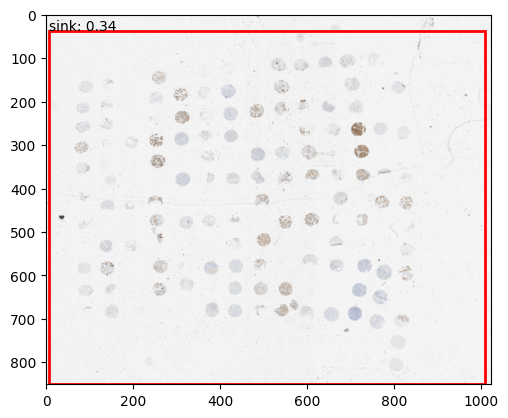

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the COCO labels (assuming you're using a model pre-trained on COCO)
coco_labels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

fig, ax = plt.subplots(1)
ax.imshow(image)

# Get the boxes, labels, and scores from the prediction
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

for box, label, score in zip(boxes, labels, scores):
    if score > 0.1:
        rect = patches.Rectangle(
            (box[0], box[1]), box[2]-box[0], box[3]-box[1],
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            box[0], box[1], f'{coco_labels[label]}: {score:.2f}',
            fontsize=10, color='black'
        )

plt.show()

In [28]:
prediction

[{'boxes': tensor([[ 372.4984,   62.9975, 1686.8297, 1196.0000],
          [ 159.3157,   87.0862, 1694.9999, 1196.0000],
          [  12.7644,   45.0450, 1133.3417, 1163.6320],
          [1204.4182, 1053.9238, 1315.9452, 1162.6466],
          [ 291.1804,   21.6227, 1694.9999, 1196.0000],
          [  16.3174,    9.6369, 1446.4298, 1142.0770],
          [  48.6223,   74.0064, 1610.9404, 1092.6826],
          [ 876.5165,   61.4481,  990.0391,  176.1245]]),
  'labels': tensor([75, 76, 75, 85, 73, 85, 59, 85]),
  'scores': tensor([0.3061, 0.2409, 0.1489, 0.1020, 0.0843, 0.0766, 0.0620, 0.0524])}]